# Imports

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import bagging
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
import joblib

In [297]:
#Importing data to open in pandas

raw_data = 'LLCP2018.XPT '

cdc_df = pd.read_sas(raw_data, format='xport')

pd.set_option('display.max_columns', 500)

#changing column names to lower case and removing the dash

cdc_df.columns= cdc_df.columns.map(lambda x: x.replace('_',''))
cdc_df.columns= cdc_df.columns.map(lambda x: x.lower())

In [1293]:
# subset of the raw data that will be used for this project 

cdc = cdc_df[['age80', 'sex1', 'imprace', 'marital', 'weight2', 'htin4','rfbmi5', 
              'educag', 'income2', 'renthom1', 'employ1', 'genhlth',
              
              'rfbing5', 'hcvu651', 'checkup1','persdoc2', 'totinda', 'smoker3', 'smokday2',  
              'alcday5',  'copdsmok', 'maxdrnks', 
            
              'sleptim1', 'michd', 'chcocncr', 'addepev2',
              'cvdstrk3', 'diabete3', 'asthma3', 'cvdinfr4', 'chcscncr', 'chccopd1', 'chckdny1' ,'drdxar1'
             ]]
,
cdc.head(2)

,age80,sex1,imprace,marital,weight2,htin4,rfbmi5,educag,income2,renthom1,employ1,genhlth,rfbing5,hcvu651,checkup1,persdoc2,totinda,smoker3,smokday2,alcday5,copdsmok,maxdrnks,sleptim1,michd,chcocncr,addepev2,cvdstrk3,diabete3,asthma3,cvdinfr4,chcscncr,chccopd1,chckdny1,drdxar1
0,80.0,2.0,1.0,3.0,130.0,64.0,1.0,4.0,6.0,1.0,2.0,2.0,1.0,9.0,1.0,1.0,2.0,4.0,NaN,888.0,88.0,NaN,7.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0
1,33.0,2.0,2.0,5.0,200.0,65.0,2.0,4.0,4.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,202.0,10.0,2.0,5.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0


In [1294]:
cdc.maxdrnks.isna().sum()

224383

In [1295]:
# 7 and 9 are used as place holders in the survey (7-i dont know, 9 -refused to answer, they have been either changed 
#a nan value and after dropped or filled with the median or mean value )

#RACE
#1 white  #2 black   #3 Asian   #4native american   #5hispanic   #6 other 

#For sex, replacing placeholders with the median value
for val in cdc.sex1.values:
    if val > 2:
        cdc.sex1 = cdc.sex1.replace({val: cdc.sex1.median()})
        

#for marital status 1) married  2) divorced 3)widowed 4)single
cdc.marital = cdc.marital.fillna(value=cdc.marital.median())
cdc.marital = cdc.marital.replace({5:4})
cdc.marital = cdc.marital.replace({6:4})
cdc.marital = cdc.marital.replace({9:4})


#Dealing with NaN values for weight and height


#Overweight
cdc.rfbmi5 = cdc.rfbmi5.replace({9:np.nan})
cdc.rfbmi5 = cdc.rfbmi5.replace({2:0})


#binge drinkers
cdc.rfbing5 = cdc.rfbing5.replace({9:np.nan})

#Smoker, former smoker or not 

cdc.smoker3 = cdc.smoker3.replace({2:1})
cdc.smoker3 = cdc.smoker3.replace({4:0})
cdc.smoker3 = cdc.smoker3.replace({9:np.nan})
cdc.smoker3 = cdc.smoker3.replace({3:0.5})

cdc.smokday2 = cdc.smokday2.replace({9:np.nan})
cdc.smokday2 = cdc.smokday2.replace({7:np.nan})

#Rent or own a home
cdc.renthom1 = cdc.renthom1.replace({9:0})
cdc.renthom1 = cdc.renthom1.replace({7:np.nan})
cdc.renthom1 = cdc.renthom1.replace({2:0})
cdc.renthom1 = cdc.renthom1.replace({3:0})



#Primary physician Do you have a personal doctor or health care provider?
cdc.persdoc2 = cdc.persdoc2.replace({2:1})
cdc.persdoc2 = cdc.persdoc2.replace({3:0})
cdc.persdoc2 = cdc.persdoc2.replace({9:np.nan})
cdc.persdoc2 = cdc.persdoc2.replace({7:np.nan})


cdc.educag = cdc.educag.replace({9:np.nan})

#Income

cdc.income2 = cdc.income2.replace({2:1}) #0 for income 25k or less
cdc.income2 = cdc.income2.replace({3:1}) #0 for income 25k or less
cdc.income2 = cdc.income2.replace({4:1}) #0 for income 25k or less
cdc.income2 = cdc.income2.replace({5:2}) #1 for income 50k or less
cdc.income2 = cdc.income2.replace({6:2}) #1 for income 50k or less
cdc.income2 = cdc.income2.replace({7:3}) #2 for income 75k or less
cdc.income2 = cdc.income2.replace({8:3}) #3 for income 75k or more
cdc.income2 = cdc.income2.replace({99:np.nan})
cdc.income2 = cdc.income2.replace({77:np.nan})


#Employment Status
cdc.employ1 = cdc.employ1.replace({2:1})
cdc.employ1 = cdc.employ1.replace({3:0})
cdc.employ1 = cdc.employ1.replace({4:0})
cdc.employ1 = cdc.employ1.replace({5:0})
cdc.employ1 = cdc.employ1.replace({6:0})
cdc.employ1 = cdc.employ1.replace({8:0})
cdc.employ1 = cdc.employ1.replace({7:0.5})
cdc.employ1 = cdc.employ1.replace({9:0})

#general health status
cdc.genhlth = cdc.genhlth.replace({9:np.nan})
cdc.genhlth = cdc.genhlth.replace({7:np.nan})
cdc.genhlth = cdc.genhlth.replace({2:1})



#Health Care coverage
cdc.hcvu651 = cdc.hcvu651.replace({2:0})
cdc.hcvu651 = cdc.hcvu651.replace({9:np.nan})


#for check up 1 is last routine check up within the past year  #2- within the past two years
#3- within the past five years  #4- 5 or more years

cdc.checkup1 = cdc.checkup1.replace({7:np.nan})
cdc.checkup1 = cdc.checkup1.replace({8:np.nan})
cdc.checkup1 = cdc.checkup1.replace({9:np.nan})



#DO HAVE ASTHMA

cdc.asthma3 = cdc.asthma3.replace({9: 0})
cdc.asthma3 = cdc.asthma3.replace({7: 0})
cdc.asthma3 = cdc.asthma3.replace({2:0})



#Adults who reported doing physical activity or exercise during the past 30 days
cdc.totinda = cdc.totinda.replace({2:0})
cdc.totinda = cdc.totinda.replace({9:np.nan})

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1296]:

#removing outliers by removing data points for weight above 700ibs & below 80ibs & height above 90 inches & below 45

cdc = cdc.loc[cdc.weight2 >= 80]
cdc = cdc.loc[cdc.weight2 <= 700]
cdc = cdc.loc[cdc.htin4 <= 90]
cdc = cdc.loc[cdc.htin4 >= 45]



In [1297]:
# Removing outliers for average sleep time (more than 24 hours is excluded)

for val in cdc.sleptim1.values:
    if val > 24:
        cdc.sleptim1 = cdc.sleptim1.replace({val:cdc.sleptim1.median()})



In [1298]:
cdc.head(2)

,age80,sex1,imprace,marital,weight2,htin4,rfbmi5,educag,income2,renthom1,employ1,genhlth,rfbing5,hcvu651,checkup1,persdoc2,totinda,smoker3,smokday2,alcday5,copdsmok,maxdrnks,sleptim1,michd,chcocncr,addepev2,cvdstrk3,diabete3,asthma3,cvdinfr4,chcscncr,chccopd1,chckdny1,drdxar1
0,80.0,2.0,1.0,3.0,130.0,64.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,NaN,888.0,88.0,NaN,7.0,2.0,2.0,2.0,2.0,3.0,0.0,2.0,1.0,2.0,2.0,1.0
1,33.0,2.0,2.0,4.0,200.0,65.0,0.0,4.0,1.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,202.0,10.0,2.0,5.0,2.0,2.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,2.0


In [1299]:
#renaming columns with columns names that are easier to understand 

cdc.columns =['age', 'sex', 'race', 'martial', 'weight', 'height', 'overweight', 
              'education', 'income', 'home','employment', 'health', 'binge','coverage', 
              'checkup', 'primaryphysician','exercise', 'smokerfreq', 'cigday',
              
              'any_alcohol', 'cigyear', 'maxalcohol','sleep_avg', 'heart_dis', 'cancer', 
              'depression', 'stroke', 'diabete3', 'asthma3', 'heart_attack', 
              'skin_cancer', 'chronic_bronchitis','kidney_disease', 'arthritis']



In [1300]:
for val in cdc.maxalcohol.values:
    if val> 40:
        cdc.maxalcohol = cdc.maxalcohol.replace({val:cdc.maxalcohol.median()})

In [1301]:
#9 AND 7 ARE PLACE HOLDERS IN THE DATA SET THEREFORE I AM REMOVING THEM TO REMOVE MISSING VALUES


cdc.chronic_bronchitis = cdc.chronic_bronchitis.replace({9:np.nan})
cdc.chronic_bronchitis = cdc.chronic_bronchitis.replace({7:np.nan})
cdc.chronic_bronchitis = cdc.chronic_bronchitis.replace({2:0})

cdc.heart_dis = cdc.heart_dis.replace({2:0})


cdc.heart_attack = cdc.heart_attack.replace({7:np.nan})
cdc.heart_attack = cdc.heart_attack.replace({2:0})
cdc.heart_attack = cdc.heart_attack.replace({9:np.nan})


cdc.skin_cancer = cdc.skin_cancer.replace({9: np.nan})
cdc.skin_cancer = cdc.skin_cancer.replace({7: np.nan})
cdc.skin_cancer = cdc.skin_cancer.replace({2:0})

cdc.cancer = cdc.cancer.replace({9:np.nan})
cdc.cancer = cdc.cancer.replace({2:0})
cdc.cancer = cdc.cancer.replace({7:np.nan})

cdc.stroke = cdc.stroke.replace({9:np.nan})
cdc.stroke = cdc.stroke.replace({7:0})
cdc.stroke = cdc.stroke.replace({2:0})


cdc.kidney_disease = cdc.kidney_disease.replace({9:np.nan})
cdc.kidney_disease = cdc.kidney_disease.replace({7:0})
cdc.kidney_disease = cdc.kidney_disease.replace({2:0})


cdc.depression = cdc.depression.replace({9:np.nan})
cdc.depression = cdc.depression.replace({7:0})
cdc.depression = cdc.depression.replace({2:0})


#1 Did not graduate High School #2 Graduated High School
#3 Attended College or Technical School #4 Graduated from College 
cdc.education = cdc.education.replace({9:np.nan})

cdc.arthritis = cdc.arthritis.replace({2:0})

cdc.binge = cdc.binge.replace({9:np.nan})


In [1302]:
cdc.shape

(402164, 34)

# Feature engineering

BMI using weight and height 

In [1303]:
cdc.head(2)

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,smokerfreq,cigday,any_alcohol,cigyear,maxalcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis
0,80.0,2.0,1.0,3.0,130.0,64.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,NaN,888.0,88.0,NaN,7.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0
1,33.0,2.0,2.0,4.0,200.0,65.0,0.0,4.0,1.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,202.0,10.0,2.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1304]:
#creating a bmi column using weight and height in the formual below

cdc['bmi'] = cdc.weight/cdc.height**2*703

Obese using bmi greater than 30 as defined by the CDC

In [1305]:
cdc['obese'] = np.where(cdc['bmi']>=30, 1, 0)

In [1306]:
#Dealing with outliers and misssing values for diabetes
for val in cdc.diabete3.values:
    if val ==3:
        cdc.diabete3 = cdc.diabete3.replace({val:0})
    if val == 4:
         cdc.diabete3 = cdc.diabete3.replace({val:1})
    if val == 2:
         cdc.diabete3 = cdc.diabete3.replace({val:1})
    if val == 7:
        cdc.diabete3 = cdc.diabete3.replace({val:np.nan})
    if val == 9:
        cdc.diabete3 = cdc.diabete3.replace({val:np.nan})
        



In [1307]:
cdc.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,smokerfreq,cigday,any_alcohol,cigyear,maxalcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese
0,80.0,2.0,1.0,3.0,130.0,64.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,NaN,888.0,88.0,NaN,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,22.312012,0
1,33.0,2.0,2.0,4.0,200.0,65.0,0.0,4.0,1.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,202.0,10.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.278107,1
2,76.0,2.0,1.0,3.0,142.0,58.0,0.0,2.0,1.0,1.0,0.5,5.0,1.0,NaN,1.0,1.0,1.0,0.0,NaN,888.0,88.0,NaN,7.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.674792,0
3,66.0,1.0,1.0,2.0,190.0,70.0,0.0,2.0,1.0,1.0,0.5,1.0,1.0,NaN,1.0,1.0,1.0,0.0,NaN,888.0,77.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.259184,0
5,80.0,2.0,1.0,3.0,172.0,62.0,0.0,3.0,NaN,1.0,0.5,1.0,1.0,NaN,1.0,1.0,0.0,0.0,NaN,888.0,88.0,NaN,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,31.455775,1


In [1308]:
cdc.dropna(axis=0, subset=('heart_dis', 'cancer', 
                           'chronic_bronchitis', 'heart_attack', 
                           'diabete3', 'asthma3', 'kidney_disease', 'depression', 
                            'skin_cancer', 'arthritis', 'primaryphysician', 
                           'employment', 'education', 'coverage', 'stroke', 'smokerfreq', 'overweight',
                           'health', 'binge', 'checkup', 'exercise', 'home', 'income', 'any_alcohol',
                           'cigday', 'cigyear' , 'maxalcohol' ), inplace=True)

In [1309]:
cdc.shape

(9550, 36)

In [1311]:
cdc.cigyear.value_counts()

10.0    1126
20.0    1053
15.0     742
30.0     649
5.0      609
        ... 
52.0       2
54.0       2
56.0       1
75.0       1
57.0       1
Name: cigyear, Length: 61, dtype: int64

In [1312]:
cdc.head()

%store cdc

Stored 'cdc' (DataFrame)


In [1313]:
#a Subset of all the chronic conditions to create a feature that identifys individuals with 
#comorbidity(individuals with 2 or more chronic conditions)

subset = cdc[['heart_dis', 'cancer' , 'stroke', 'diabete3',  'heart_attack', 
        'chronic_bronchitis', 'kidney_disease', 'arthritis']]

#adding the values of each of the independent variable to identify participants with more than one chronic condition 
#after adding the values, if the sum was greater than two, the comorbid value will be assigned the value of one
cdc['comorbid'] = subset.sum(axis=1)
cdc['comorbid'] = np.where(cdc['comorbid']>=2, 1, 0)

In [1314]:
cdc['chronic'] = subset.sum(axis=1)
cdc['chronic'] = np.where(cdc['chronic']>=1, 1, 0)

In [1315]:

#scaling data to put data points on a scale of zero to one
scaler = MinMaxScaler()
cdc_new = scaler.fit_transform(cdc)

In [1316]:
cdc_new= pd.DataFrame(cdc_new)

cdc_new.round(2)
cdc_new.columns=cdc.columns

cdc_new.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,smokerfreq,cigday,any_alcohol,cigyear,maxalcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese,comorbid,chronic
0,0.326087,1.0,0.2,1.000000,0.285714,0.441176,0.0,1.000000,0.0,0.0,1.0,0.5,0.0,0.0,0.333333,1.0,1.0,1.0,0.0,0.782946,0.091837,0.025641,0.173913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276687,1.0,0.0,0.0
1,0.826087,0.0,0.0,0.000000,0.297619,0.676471,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0,0.000000,0.775510,0.000000,0.217391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188440,0.0,0.0,1.0
2,0.608696,1.0,0.0,0.000000,0.190476,0.382353,0.0,0.666667,0.5,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,0.000000,0.193878,0.128205,0.217391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.206786,0.0,0.0,1.0
3,0.673913,0.0,0.0,0.000000,0.488095,0.617647,0.0,1.000000,1.0,1.0,1.0,0.5,0.0,1.0,0.000000,1.0,1.0,0.0,1.0,0.000000,0.091837,0.051282,0.217391,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.368224,1.0,0.0,1.0
4,0.847826,0.0,1.0,0.333333,0.202381,0.558824,1.0,0.333333,0.0,0.0,1.0,0.5,1.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.775194,0.295918,0.025641,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150507,0.0,0.0,0.0


In [1317]:
#selecting the target and independent variables

#independent variables
X = cdc_new.drop(['chronic', 'heart_dis', 'cancer', 'stroke', 'diabete3', 'asthma3',
              'heart_attack', 'skin_cancer', 'chronic_bronchitis', 'kidney_disease', 
              'arthritis', 'comorbid', 'arthritis', 'skin_cancer', 'depression',
                  
               'exercise', 'overweight', 'smokerfreq', 'any_alcohol','obese',     
        
              
            
              ], axis=1)
#'heart_attack'
#target variable
y = cdc_new.chronic
X.head()

,age,sex,race,martial,weight,height,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,cigday,cigyear,maxalcohol,sleep_avg,bmi
0,0.326087,1.0,0.2,1.000000,0.285714,0.441176,1.000000,0.0,0.0,1.0,0.5,0.0,0.0,0.333333,1.0,0.0,0.091837,0.025641,0.173913,0.276687
1,0.826087,0.0,0.0,0.000000,0.297619,0.676471,0.333333,1.0,1.0,1.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.775510,0.000000,0.217391,0.188440
2,0.608696,1.0,0.0,0.000000,0.190476,0.382353,0.666667,0.5,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.193878,0.128205,0.217391,0.206786
3,0.673913,0.0,0.0,0.000000,0.488095,0.617647,1.000000,1.0,1.0,1.0,0.5,0.0,1.0,0.000000,1.0,1.0,0.091837,0.051282,0.217391,0.368224
4,0.847826,0.0,1.0,0.333333,0.202381,0.558824,0.333333,0.0,0.0,1.0,0.5,1.0,0.0,1.000000,0.0,0.0,0.295918,0.025641,0.217391,0.150507


In [1318]:
y.value_counts(normalize=True)

0.0    0.573298
1.0    0.426702
Name: chronic, dtype: float64

In [1319]:
#Spliting data in to training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)


#instantiating logistic regression model

log_reg = LogisticRegression()

#fiting logistic regression to training data

log_model = log_reg.fit(X_train, y_train)

In [1320]:
log_model.score(X_train, y_train)

0.7231114435302917

In [1321]:
coef = log_model.coef_.flatten()

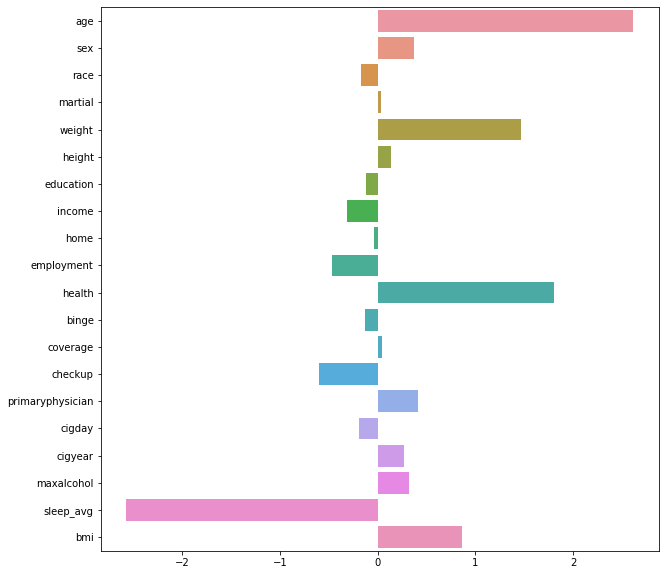

In [1322]:
#Plotting a barplot to visualize coefficients of the regression model and their importance

plt.figure(figsize=(10,10))
sns.barplot(coef, X_train.columns)

# A negative coefficient suggests that as the independent variable increases,
# the dependent variable tends to decrease. 

In [1323]:
#sleepavg
#age
#weight
#health
#checkup
#bmi
#employeement
#income


In [1324]:
# # #saving the model 
# with open("log_model.pkl","wb") as logi_model:
    
#      joblib.dump(log_model,logi_model, compress=4)

In [1325]:
#Fitting models to Random Forst calssifier
R_forest = RandomForestClassifier()

R_forest = RandomForestClassifier( n_estimators=300,criterion='gini' , random_state=28)
R_model = R_forest.fit(X_train, y_train)

In [1331]:
R_model.score(X_train, y_train)

1.0

In [1332]:
a = pd.DataFrame(R_model.feature_importances_)

a['features'] = X_train.columns

a.columns = ['importance', 'features']
a = a.sort_values(by='importance', ascending=False)

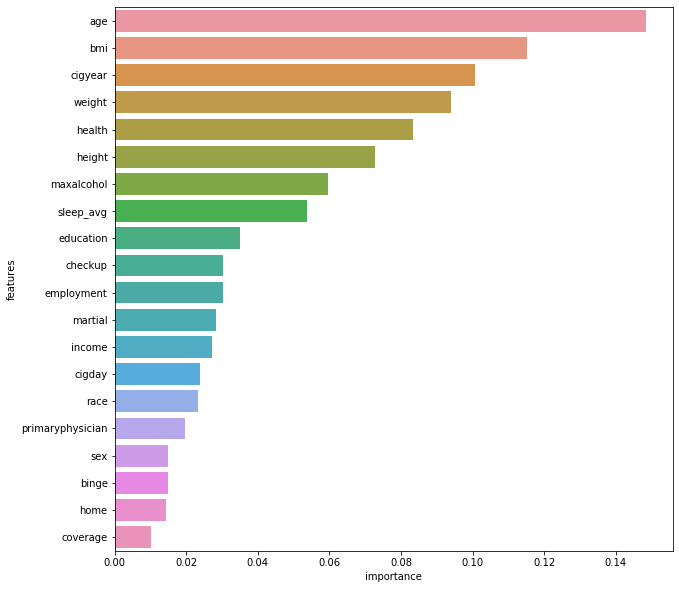

In [1333]:
plt.figure(figsize=(10, 10))
sns.barplot(a.importance, a.features)

In [1334]:
cdc.education.value_counts()

3.0    3009
2.0    2990
4.0    2936
1.0     615
Name: education, dtype: int64

In [1337]:
#saving the model 
with open("random_model.pkl","wb") as Random_model:
        joblib.dump(R_model,Random_model)